In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Dataset dan Data Manipulation

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_COVID = pd.read_excel("/content/drive/MyDrive/Data Science/Competition/Compfest/Daily Update Data Agregat Covid-19 Jakarta.xlsx", sheet_name = 'Data Indonesia dan Jakarta')
data_Vaksinasi = pd.read_excel("/content/drive/MyDrive/Data Science/Competition/Compfest/Daily Update Data Agregat Covid-19 Jakarta.xlsx", sheet_name = "Vaksinasi Edited")

In [5]:
data_COVID['Tanggal'] = pd.to_datetime(data_COVID['Tanggal'], format = "%Y-%m-%d")
data_Vaksinasi['Tanggal'] = pd.to_datetime(data_Vaksinasi['Tanggal'], format = "%Y-%m-%d")

## Data COVID

In [6]:
data_COVID.head()

,Tanggal,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Dirawat Harian (Indonesia),Positif Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
0,2020-03-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-03-02,0,0,2,2,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0
2,2020-03-03,0,0,2,2,1,0,0,2,3,2,0,0,0,0,1,0,0,2,3,2
3,2020-03-04,0,0,2,2,1,0,0,2,3,2,0,0,0,0,0,0,0,0,0,0
4,2020-03-05,0,0,2,2,3,0,0,4,7,4,0,0,0,0,2,0,0,2,4,2


In [8]:
data_COVID.columns

Index(['Tanggal', 'Meninggal (Indonesia)', 'Sembuh (Indonesia)',
       'Dirawat (Indonesia)', 'Positif (Indonesia)', 'Meninggal (Jakarta)',
       'Sembuh (Jakarta)', 'Self-Isolation (Jakarta)', 'Dirawat (Jakarta)',
       'Positif (Jakarta)', 'Positif Aktif (Jakarta)',
       'Meninggal Harian (Indonesia)', 'Sembuh Harian (Indonesia)',
       'Dirawat Harian (Indonesia)', 'Positif Harian (Indonesia)',
       'Meninggal Harian (Jakarta)', 'Sembuh Harian (Jakarta)',
       'Self-Isolation Harian (Jakarta)', 'Dirawat Harian (Jakarta)',
       'Positif Harian (Jakarta)', 'Positif Aktif Harian (Jakarta)'],
      dtype='object')

In [9]:
kolom_IDN = ['Tanggal','Meninggal (Indonesia)','Sembuh (Indonesia)','Dirawat (Indonesia)','Positif (Indonesia)','Meninggal Harian (Indonesia)','Sembuh Harian (Indonesia)','Positif Harian (Indonesia)','Dirawat Harian (Indonesia)']
data_COVID_IDN = data_COVID[kolom_IDN]

In [10]:
kolom_JKT = ['Tanggal','Meninggal (Jakarta)','Sembuh (Jakarta)', 'Self-Isolation (Jakarta)', 'Dirawat (Jakarta)',
       'Positif (Jakarta)', 'Positif Aktif (Jakarta)','Meninggal Harian (Jakarta)', 'Sembuh Harian (Jakarta)',
       'Self-Isolation Harian (Jakarta)', 'Dirawat Harian (Jakarta)',
       'Positif Harian (Jakarta)', 'Positif Aktif Harian (Jakarta)']
data_COVID_JKT = data_COVID[kolom_JKT]

In [11]:
data_COVID_IDN.head()

,Tanggal,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Positif Harian (Indonesia),Dirawat Harian (Indonesia)
0,2020-03-01,0,0,0,0,0,0,0,0
1,2020-03-02,0,0,2,2,0,0,2,2
2,2020-03-03,0,0,2,2,0,0,0,0
3,2020-03-04,0,0,2,2,0,0,0,0
4,2020-03-05,0,0,2,2,0,0,0,0


In [12]:
data_COVID_JKT.head()

,Tanggal,Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
0,2020-03-01,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-03-02,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-03-03,1,0,0,2,3,2,1,0,0,2,3,2
3,2020-03-04,1,0,0,2,3,2,0,0,0,0,0,0
4,2020-03-05,3,0,0,4,7,4,2,0,0,2,4,2


In [13]:
data_COVID_IDN['Dirawat (Indonesia)'] = data_COVID_IDN['Dirawat (Indonesia)'] - data_COVID_JKT['Dirawat (Jakarta)']
data_COVID_IDN['Meninggal (Indonesia)'] = data_COVID_IDN['Meninggal (Indonesia)'] - data_COVID_JKT['Meninggal (Jakarta)']
data_COVID_IDN['Sembuh (Indoensia)'] = data_COVID_IDN['Sembuh (Indonesia)'] - data_COVID_JKT['Sembuh (Jakarta)']
data_COVID_IDN['Positif (Indonesia)'] = data_COVID_IDN['Positif (Indonesia)'] - data_COVID_JKT['Positif (Jakarta)']
data_COVID_IDN['Meninggal Harian (Indonesia)'] = data_COVID_IDN['Meninggal Harian (Indonesia)'] - data_COVID_JKT['Meninggal Harian (Jakarta)']
data_COVID_IDN['Sembuh Harian (Indonesia)'] = data_COVID_IDN['Sembuh Harian (Indonesia)'] - data_COVID_JKT['Sembuh Harian (Jakarta)']
data_COVID_IDN['Positif Harian (Indonesia)'] = data_COVID_IDN['Positif Harian (Indonesia)'] - data_COVID_JKT['Positif Harian (Jakarta)']
data_COVID_IDN['Dirawat Harian (Indonesia)'] = data_COVID_IDN['Dirawat Harian (Indonesia)'] - data_COVID_JKT['Dirawat Harian (Jakarta)']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [14]:
data_COVID_IDN.tail()

,Tanggal,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Positif Harian (Indonesia),Dirawat Harian (Indonesia),Sembuh (Indoensia)
487,2021-07-01,50467,1890287,229642,1652099,462,6356,17295,12484,1421826
488,2021-07-02,50987,1901865,242159,1668530,520,6572,16431,12517,1428398
489,2021-07-03,51450,1915147,254235,1686741,463,7599,18211,12076,1435997
490,2021-07-04,51930,1928274,267541,1703489,480,7328,16748,13306,1443325
491,2021-07-05,52361,1942690,281709,1722331,431,7809,18842,14168,1451134


## Data Vaksinasi

In [15]:
data_Vaksinasi.head()

,Tanggal,Target Vaksinasi_Tenaga Kesehatan,DKI_Vaksinasi 1_Tenaga Kesehatan,DKI_Vaksinasi 2_Tenaga Kesehatan,DKI_Persentase 1_Tenaga Kesehatan,DKI_Persentase 2_Tenaga Kesehatan,DKI_Target Vaksinasi_Lansia,DKI_Vaksinasi 1_Lansia,DKI_Vaksinasi 2_Lansia,DKI_Persentase 1_Lansia,DKI_Persentase 2_Lansia,DKI_Target Vaksinasi_Pelayanan Publik,DKI_Vaksinasi 1_Pelayanan Publik,DKI_Vaksinasi 2_Pelayanan Publik,DKI_Persentase 1_Pelayanan Publik,DKI_Persentase 2_Pelayanan Publik,Total DKI Target Vaksinasi,Total DKI Vaksinasi 1,Total DKI Vaksinasi 2,Total DKI Persentase 1,Total DKI Persentase 2,IDN_Target Vaksinasi_Tenaga Kesehatan,IDN_Vaksinasi 1_Tenaga Kesehatan,IDN_Vaksinasi 2_Tenaga Kesehatan,IDN_Persentase 1_Tenaga Kesehatan,IDN_Persentase 2_Tenaga Kesehatan,IDN_Target Vaksinasi_Lansia,IDN_Vaksinasi 1_Lansia,IDN_Vaksinasi 2_Lansia,IDN_Persentase 1_Lansia,IDN_Persentase 2_Lansia,IDN_Target Vaksinasi_Pelayanan Publik,IDN_Vaksinasi 1_Pelayanan Publik,IDN_Vaksinasi 2_Pelayanan Publik,IDN_Persentase 1_Pelayanan Publik,IDN_Persentase 2_Pelayanan Publik,Total IDN Target Vaksinasi,Total IDN Vaksinasi 1,Total IDN Vaksinasi 2,Total IDN Persentase 1,Total IDN Persentase 2
0,2021-03-05,112301,141425,91078,1.259339,0.811017,911631,76451,0,0.083862,0.000000,1976757,64121,0,0.032437,0.000000,3000689,281997,91078,0.093977,0.030352,1468764,1692016,1111938,1.152000,0.757057,21553118,179711,2,0.008338,9.279400e-08,17327169,541888,2597,0.031274,0.000150,40349051,2413615,1114537,0.059818,0.027622
1,2021-03-06,112301,144046,91379,1.282678,0.813697,911631,79421,0,0.087120,0.000000,1976757,66484,0,0.033633,0.000000,3000689,289951,91379,0.096628,0.030453,1468764,1741784,1126353,1.185884,0.766871,21553118,206025,2,0.009559,9.279400e-08,17327169,604456,4169,0.034885,0.000241,40349051,2552265,1130524,0.063255,0.028019
2,2021-03-07,112301,177126,91460,1.577243,0.814418,911631,83628,0,0.091734,0.000000,1976757,73752,2514,0.037310,0.001272,3000689,334506,93974,0.111476,0.031317,1468764,2049651,1129340,1.395494,0.768905,21553118,215632,2,0.010005,9.279400e-08,17327169,623474,4445,0.035982,0.000257,40349051,2888757,1133787,0.071594,0.028099
3,2021-03-08,112301,181237,92988,1.613850,0.828025,911631,95140,1,0.104362,0.000001,1976757,85333,3989,0.043168,0.002018,3000689,361710,96978,0.120542,0.032319,1468764,2114655,1149547,1.439751,0.782663,21553118,267603,5,0.012416,2.319850e-07,17327169,715767,8880,0.041309,0.000512,40349051,3098025,1158432,0.076781,0.028710
4,2021-03-09,112301,113326,89984,1.009127,0.801275,911631,135128,675,0.148227,0.000740,1976757,174685,29195,0.088369,0.014769,3000689,423139,119854,0.141014,0.039942,1468764,1395498,1127633,0.950117,0.767743,21553118,430591,1612,0.019978,7.479196e-05,17327169,1510937,68527,0.087200,0.003955,40349051,3337026,1197772,0.082704,0.029685


In [16]:
data_Vaksinasi.columns

Index(['Tanggal', 'Target Vaksinasi_Tenaga Kesehatan',
       'DKI_Vaksinasi 1_Tenaga Kesehatan', 'DKI_Vaksinasi 2_Tenaga Kesehatan',
       'DKI_Persentase 1_Tenaga Kesehatan',
       'DKI_Persentase 2_Tenaga Kesehatan', 'DKI_Target Vaksinasi_Lansia',
       'DKI_Vaksinasi 1_Lansia', 'DKI_Vaksinasi 2_Lansia',
       'DKI_Persentase 1_Lansia', 'DKI_Persentase 2_Lansia',
       'DKI_Target Vaksinasi_Pelayanan Publik',
       'DKI_Vaksinasi 1_Pelayanan Publik', 'DKI_Vaksinasi 2_Pelayanan Publik',
       'DKI_Persentase 1_Pelayanan Publik',
       'DKI_Persentase 2_Pelayanan Publik', 'Total DKI Target Vaksinasi',
       'Total DKI Vaksinasi 1', 'Total DKI Vaksinasi 2',
       'Total DKI Persentase 1', 'Total DKI Persentase 2',
       'IDN_Target Vaksinasi_Tenaga Kesehatan',
       'IDN_Vaksinasi 1_Tenaga Kesehatan', 'IDN_Vaksinasi 2_Tenaga Kesehatan',
       'IDN_Persentase 1_Tenaga Kesehatan',
       'IDN_Persentase 2_Tenaga Kesehatan', 'IDN_Target Vaksinasi_Lansia',
       'IDN_Vaksinas

In [17]:
kolom_vaksinasi_JKT = ['Tanggal', 'Target Vaksinasi_Tenaga Kesehatan',
       'DKI_Vaksinasi 1_Tenaga Kesehatan', 'DKI_Vaksinasi 2_Tenaga Kesehatan',
       'DKI_Persentase 1_Tenaga Kesehatan',
       'DKI_Persentase 2_Tenaga Kesehatan', 'DKI_Target Vaksinasi_Lansia',
       'DKI_Vaksinasi 1_Lansia', 'DKI_Vaksinasi 2_Lansia',
       'DKI_Persentase 1_Lansia', 'DKI_Persentase 2_Lansia',
       'DKI_Target Vaksinasi_Pelayanan Publik',
       'DKI_Vaksinasi 1_Pelayanan Publik', 'DKI_Vaksinasi 2_Pelayanan Publik',
       'DKI_Persentase 1_Pelayanan Publik',
       'DKI_Persentase 2_Pelayanan Publik', 'Total DKI Target Vaksinasi',
       'Total DKI Vaksinasi 1', 'Total DKI Vaksinasi 2',
       'Total DKI Persentase 1', 'Total DKI Persentase 2']
data_Vaksinasi_JKT = data_Vaksinasi[kolom_vaksinasi_JKT]

In [18]:
kolom_vaksinasi_IDN = ['Tanggal','IDN_Target Vaksinasi_Tenaga Kesehatan',
       'IDN_Vaksinasi 1_Tenaga Kesehatan', 'IDN_Vaksinasi 2_Tenaga Kesehatan',
       'IDN_Persentase 1_Tenaga Kesehatan',
       'IDN_Persentase 2_Tenaga Kesehatan', 'IDN_Target Vaksinasi_Lansia',
       'IDN_Vaksinasi 1_Lansia', 'IDN_Vaksinasi 2_Lansia',
       'IDN_Persentase 1_Lansia', 'IDN_Persentase 2_Lansia',
       'IDN_Target Vaksinasi_Pelayanan Publik',
       'IDN_Vaksinasi 1_Pelayanan Publik', 'IDN_Vaksinasi 2_Pelayanan Publik',
       'IDN_Persentase 1_Pelayanan Publik',
       'IDN_Persentase 2_Pelayanan Publik', 'Total IDN Target Vaksinasi',
       'Total IDN Vaksinasi 1', 'Total IDN Vaksinasi 2',
       'Total IDN Persentase 1', 'Total IDN Persentase 2']
data_Vaksinasi_IDN = data_Vaksinasi[kolom_vaksinasi_IDN]

# Apakah ada Ketimpangan dalam Jumlah Pasien?

## Meninggal

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

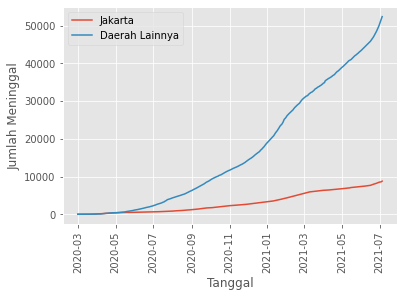

In [20]:
plt.plot(data_COVID['Tanggal'], data_COVID_JKT['Meninggal (Jakarta)'], label = 'Jakarta')
plt.plot(data_COVID['Tanggal'], data_COVID_IDN['Meninggal (Indonesia)'], label = 'Daerah Lainnya')
plt.xlabel("Tanggal")
plt.xticks(rotation = 90)
plt.ylabel("Jumlah Meninggal")
plt.legend()
plt.show()

## Sembuh

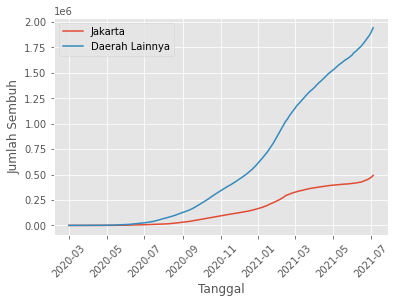

In [21]:
plt.plot(data_COVID['Tanggal'], data_COVID_JKT['Sembuh (Jakarta)'], label = 'Jakarta')
plt.plot(data_COVID['Tanggal'], data_COVID_IDN['Sembuh (Indonesia)'], label = 'Daerah Lainnya')
plt.xlabel("Tanggal")
plt.xticks(rotation = 45)
plt.ylabel("Jumlah Sembuh")
plt.legend()
plt.show()

## Dirawat

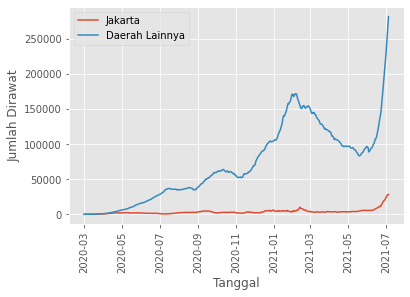

In [22]:
plt.plot(data_COVID['Tanggal'], data_COVID_JKT['Dirawat (Jakarta)'], label = 'Jakarta')
plt.plot(data_COVID['Tanggal'], data_COVID_IDN['Dirawat (Indonesia)'], label = 'Daerah Lainnya')
plt.xlabel("Tanggal")
plt.xticks(rotation = 90)
plt.ylabel("Jumlah Dirawat")
plt.legend()
plt.show()

# Pertanyaan 1-2

In [23]:
data_COVID_JKT.head()

,Tanggal,Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
0,2020-03-01,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-03-02,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-03-03,1,0,0,2,3,2,1,0,0,2,3,2
3,2020-03-04,1,0,0,2,3,2,0,0,0,0,0,0
4,2020-03-05,3,0,0,4,7,4,2,0,0,2,4,2


In [24]:
data_COVID_JKT['Positif Harian (Jakarta)'].describe()

count      492.000000
mean      1202.231707
std       1547.785224
min          0.000000
25%        204.250000
50%        859.000000
75%       1392.500000
max      10903.000000
Name: Positif Harian (Jakarta), dtype: float64

In [25]:
# Modus
data_COVID_JKT['Positif Harian (Jakarta)'].value_counts().index[0]

0

# Pertanyaan 3

In [26]:
import numpy as np

In [27]:
def outlier(df,kolom):
  q1,q3 = df[kolom].quantile([0.25,0.75])

  lb = q1 - (1.5*(q3-q1))
  ub =  q3 + (1.5*(q3-q1))

  outlier  = df[(df[kolom]>ub) | (df[kolom]<lb)]

  return outlier[kolom]
    

In [28]:
outlier(data_COVID_JKT, 'Positif Harian (Jakarta)')

318     3476
321     3536
322     3395
325     3786
327     3792
328     3285
329     3512
334     3448
335     3491
336     3474
337     3614
338     3362
339     3567
340     3632
341     3340
343     4213
345     3437
346     3309
348     3810
473     4144
474     4737
475     4895
476     5582
477     5014
478     3221
479     4693
480     7505
481     6934
482     9271
483     9394
484     8348
485     7379
486     7680
487     7541
488     9399
489     9702
490    10485
491    10903
Name: Positif Harian (Jakarta), dtype: int64

# Pertanyaan 4

In [30]:
data_Jakarta = pd.read_excel("/content/drive/MyDrive/Data Science/Competition/Compfest/Daily Update Data Agregat Covid-19 Jakarta.xlsx", sheet_name = 'Data Jakarta')

In [32]:
data_Jakarta.head()

,Tanggal,Jam,Tanggal Jam,Total Pasien,Sembuh,Meninggal,Self Isolation,Masih Perawatan,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data
0,2020-03-01,NaN,2020-03-01 18:00:00,0,0,0,0,0,0,0,0,0,0,0
1,2020-03-02,NaN,2020-03-02 18:00:00,0,0,0,0,0,0,0,0,0,0,0
2,2020-03-03,NaN,2020-03-03 18:00:00,3,0,1,0,2,3,2,0,0,0,0
3,2020-03-04,NaN,2020-03-04 18:00:00,3,0,1,0,2,0,2,0,0,0,0
4,2020-03-05,NaN,2020-03-05 18:00:00,7,0,3,0,4,4,4,0,0,0,0


In [34]:
data_Jakarta.drop(['Tanggal Jam','Jam','Belum Diketahui (masih verifikasi)','Menunggu Hasil','Tenaga Kesehatan Terinfeksi', 'Tanpa Gejala','Bergejala','Belum Ada Data'], axis = 1, inplace = True)

KeyError: ignored

In [ ]:
data_Jakarta.head(10)

In [35]:
data_Jakarta['Tanggal'] = pd.to_datetime(data_Jakarta['Tanggal'], format = '%Y-%m-%d')

In [36]:
data_Jakarta['Bulan'] = data_Jakarta['Tanggal'].dt.month

In [37]:
agregat = data_Jakarta.groupby('Bulan').mean()

In [38]:
agregat.head()

,Jam,Total Pasien,Sembuh,Meninggal,Self Isolation,Masih Perawatan,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data
Bulan,,,,,,,,,,,,
1,8.000000,224891.741935,201050.580645,3752.870968,15563.290323,4525.000000,2773.645161,20088.290323,2489.935484,7415.290323,10563.967742,2109.032258
2,8.000000,311788.857143,288952.428571,4904.607143,11939.392857,5992.428571,2500.607143,17931.821429,2922.250000,3549.857143,9596.428571,4785.535714
3,10.093023,181465.258065,174793.096774,3020.225806,1933.387097,1718.548387,694.532258,3651.935484,728.451613,572.887097,1995.225806,989.435484
4,9.500000,199454.583333,191669.916667,3375.950000,1973.516667,2435.200000,499.366667,4408.716667,438.250000,683.733333,1992.600000,690.150000
5,8.000000,212663.419355,202662.887097,3763.177419,2982.822581,3254.532258,396.338710,6237.354839,303.629032,747.064516,3009.000000,464.677419


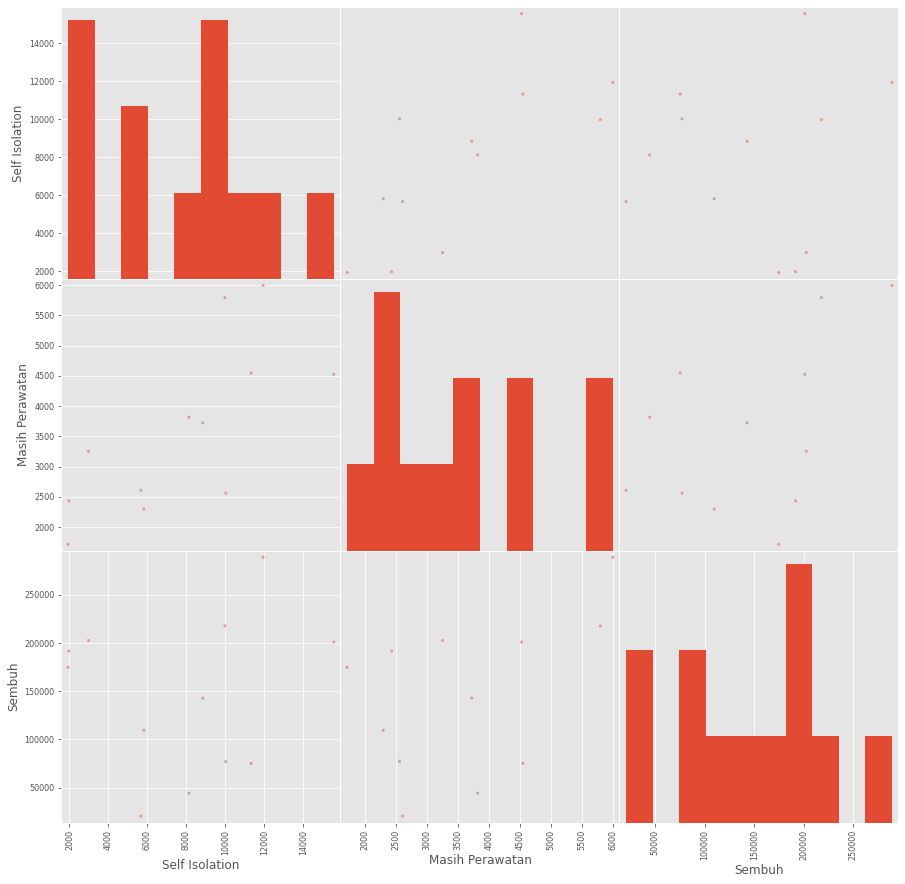

In [39]:
pd.plotting.scatter_matrix(agregat[['Self Isolation','Masih Perawatan','Sembuh']], figsize = (15,15))
plt.show()

In [40]:
print(agregat['Self Isolation'].corr(agregat['Sembuh']))

0.09687779891566292


In [41]:
print(agregat['Masih Perawatan'].corr(agregat['Sembuh']))

0.46811252695645716


In [42]:
print(data_Jakarta['Self Isolation'].corr(data_Jakarta['Sembuh']))
print(data_Jakarta['Masih Perawatan'].corr(data_Jakarta['Sembuh']))

0.39075205449427736
0.6090154974404964


# Apakah ada ketimpangan vaksinasi antara Jakarta dengan sekitar Indonesia?

In [43]:
data_Vaksinasi_JKT_sorted = data_Vaksinasi_JKT.iloc[:, -5:]
data_Vaksinasi_IDN_sorted = data_Vaksinasi_IDN.iloc[:, -5:]

data_Vaksinasi_JKT_sorted['Tanggal'] = data_Vaksinasi_JKT['Tanggal']
data_Vaksinasi_IDN_sorted['Tanggal'] = data_Vaksinasi_IDN['Tanggal']

In [44]:
data_Vaksinasi_IDN_sorted.head()

,Total IDN Target Vaksinasi,Total IDN Vaksinasi 1,Total IDN Vaksinasi 2,Total IDN Persentase 1,Total IDN Persentase 2,Tanggal
0,40349051,2413615,1114537,0.059818,0.027622,2021-03-05
1,40349051,2552265,1130524,0.063255,0.028019,2021-03-06
2,40349051,2888757,1133787,0.071594,0.028099,2021-03-07
3,40349051,3098025,1158432,0.076781,0.028710,2021-03-08
4,40349051,3337026,1197772,0.082704,0.029685,2021-03-09


In [45]:
data_Vaksinasi_JKT_sorted['Bulan'] = data_Vaksinasi_JKT['Tanggal'].dt.month
data_Vaksinasi_IDN_sorted['Bulan'] = data_Vaksinasi_IDN['Tanggal'].dt.month

In [46]:
data_Vaksinasi_IDN_sorted['Total IDN Target Vaksinasi'] = data_Vaksinasi_IDN_sorted['Total IDN Target Vaksinasi'] - data_Vaksinasi_JKT_sorted['Total DKI Target Vaksinasi']
data_Vaksinasi_IDN_sorted['Total IDN Vaksinasi 1'] = data_Vaksinasi_IDN_sorted['Total IDN Vaksinasi 1'] - data_Vaksinasi_JKT_sorted['Total DKI Vaksinasi 1']
data_Vaksinasi_IDN_sorted['Total IDN Vaksinasi 2'] = data_Vaksinasi_IDN_sorted['Total IDN Vaksinasi 2'] - data_Vaksinasi_JKT_sorted['Total DKI Vaksinasi 2']

In [47]:
data_Vaksinasi_IDN_sorted['Total IDN Persentase 1'] = data_Vaksinasi_IDN_sorted['Total IDN Vaksinasi 1']/data_Vaksinasi_IDN_sorted['Total IDN Target Vaksinasi']
data_Vaksinasi_IDN_sorted['Total IDN Persentase 2'] = data_Vaksinasi_IDN_sorted['Total IDN Vaksinasi 2']/data_Vaksinasi_IDN_sorted['Total IDN Target Vaksinasi']

In [ ]:
data_Vaksinasi_IDN_sorted.head()

## Vaksinasi 1

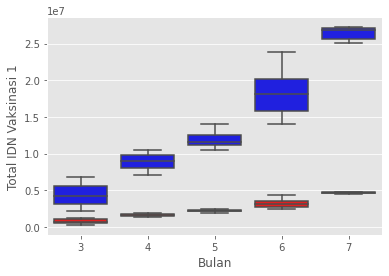

In [48]:
array = [3,4,5,6,7]
sns.boxplot(x = 'Bulan', y = 'Total DKI Vaksinasi 1', data = data_Vaksinasi_JKT_sorted, color = 'red')
sns.boxplot(x = 'Bulan', y = 'Total IDN Vaksinasi 1', data = data_Vaksinasi_IDN_sorted, color = 'blue')
plt.show()

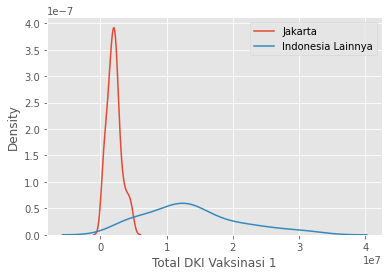

In [49]:
sns.kdeplot(x = 'Total DKI Vaksinasi 1', data = data_Vaksinasi_JKT, label = 'Jakarta')
sns.kdeplot(x = 'Total IDN Vaksinasi 1', data = data_Vaksinasi_IDN, label = 'Indonesia Lainnya')
plt.legend()
plt.show()

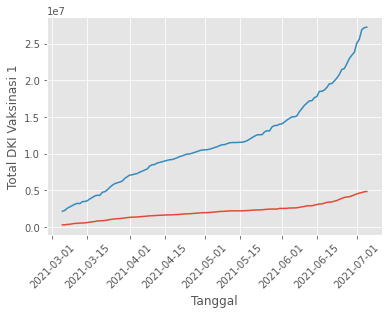

In [50]:
sns.lineplot(x = 'Tanggal', y = 'Total DKI Vaksinasi 1', data = data_Vaksinasi_JKT_sorted)
sns.lineplot(x = 'Tanggal', y = 'Total IDN Vaksinasi 1', data = data_Vaksinasi_IDN_sorted)
plt.xticks(rotation = 45)
plt.show()

## Vaksinasi 2

In [ ]:
array = [3,4,5,6,7]
sns.boxplot(x = 'Bulan', y = 'Total DKI Vaksinasi 2', data = data_Vaksinasi_JKT_sorted, color = 'red')
sns.boxplot(x = 'Bulan', y = 'Total IDN Vaksinasi 2', data = data_Vaksinasi_IDN_sorted, color = 'blue')
plt.show()

In [ ]:
sns.lineplot(x = 'Tanggal', y = 'Total DKI Vaksinasi 2', data = data_Vaksinasi_JKT_sorted)
sns.lineplot(x = 'Tanggal', y = 'Total IDN Vaksinasi 2', data = data_Vaksinasi_IDN_sorted)
plt.xticks(rotation = 45)
plt.show()

## Persentase Vaksinasi 1

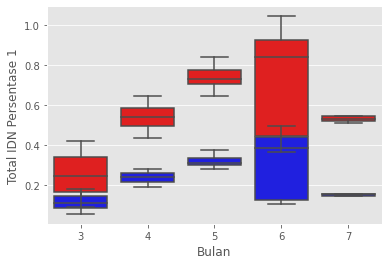

In [51]:
sns.boxplot(x = 'Bulan', y = 'Total DKI Persentase 1', data = data_Vaksinasi_JKT_sorted, color = 'red')
sns.boxplot(x = 'Bulan', y = 'Total IDN Persentase 1', data = data_Vaksinasi_IDN_sorted, color = 'blue')
plt.show()

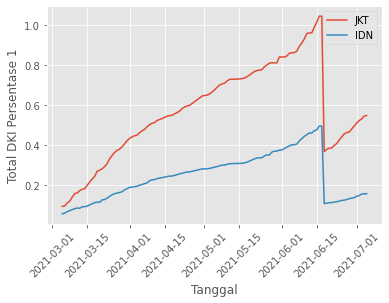

In [52]:
sns.lineplot(x = 'Tanggal', y = 'Total DKI Persentase 1', data = data_Vaksinasi_JKT_sorted, label = 'JKT')
sns.lineplot(x = 'Tanggal', y = 'Total IDN Persentase 1', data = data_Vaksinasi_IDN_sorted, label = 'IDN')
plt.xticks(rotation = 45)
plt.show()

## Persentase Vaksinasi 2

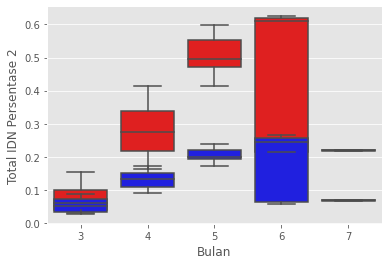

In [53]:
sns.boxplot(x = 'Bulan', y = 'Total DKI Persentase 2', data = data_Vaksinasi_JKT_sorted, color = 'red')
sns.boxplot(x = 'Bulan', y = 'Total IDN Persentase 2', data = data_Vaksinasi_IDN_sorted, color = 'blue')
plt.show()

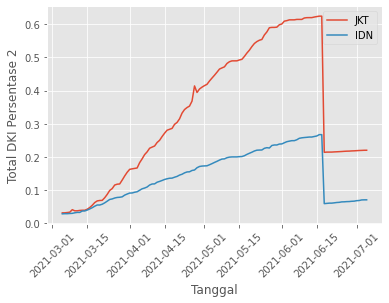

In [54]:
sns.lineplot(x = 'Tanggal', y = 'Total DKI Persentase 2', data = data_Vaksinasi_JKT_sorted, label = 'JKT')
sns.lineplot(x = 'Tanggal', y = 'Total IDN Persentase 2', data = data_Vaksinasi_IDN_sorted, label = 'IDN')
plt.xticks(rotation = 45)
plt.show()

In [55]:
data_COVID_JKT.head()

,Tanggal,Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
0,2020-03-01,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-03-02,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-03-03,1,0,0,2,3,2,1,0,0,2,3,2
3,2020-03-04,1,0,0,2,3,2,0,0,0,0,0,0
4,2020-03-05,3,0,0,4,7,4,2,0,0,2,4,2


# 3. Apakah ada korelasi antara jumlah vaksinasi dengan angka positif covid?

In [56]:
subset_COVID_JKT = data_COVID_JKT[data_COVID_JKT['Tanggal'].isin(data_Vaksinasi_JKT_sorted['Tanggal'])]
subset_COVID_IDN = data_COVID_IDN[data_COVID_IDN['Tanggal'].isin(data_Vaksinasi_IDN_sorted['Tanggal'])]

In [57]:
subset_COVID_JKT.head()

,Tanggal,Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
369,2021-03-05,5702,334100,4026,3147,346975,7173,45,1342,86,-314,1159,-228
370,2021-03-06,5748,335617,4228,2998,348591,7226,46,1517,202,-149,1616,53
371,2021-03-07,5790,337426,4194,3015,350425,7209,42,1809,-34,17,1834,-17
372,2021-03-08,5838,338931,4494,2945,352208,7439,48,1505,300,-70,1783,230
373,2021-03-09,5883,340587,3856,2749,353075,6605,45,1656,-638,-196,867,-834


In [58]:
subset_COVID_IDN.head()

,Tanggal,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Positif Harian (Indonesia),Dirawat Harian (Indonesia),Sembuh (Indoensia)
369,2021-03-05,31324,1182687,145233,1021118,84,4989,5836,849,848587
370,2021-03-06,31406,1189510,144174,1025245,82,5306,4127,-1059,853893
371,2021-03-07,31476,1194656,144725,1029237,70,3337,3992,551,857230
372,2021-03-08,31709,1203381,142683,1034348,233,7220,5111,-2042,864450
373,2021-03-09,31874,1210877,141562,1039870,165,5840,5522,-1121,870290


In [59]:
data_Vaksinasi_JKT_sorted.head()

,Total DKI Target Vaksinasi,Total DKI Vaksinasi 1,Total DKI Vaksinasi 2,Total DKI Persentase 1,Total DKI Persentase 2,Tanggal,Bulan
0,3000689,281997,91078,0.093977,0.030352,2021-03-05,3
1,3000689,289951,91379,0.096628,0.030453,2021-03-06,3
2,3000689,334506,93974,0.111476,0.031317,2021-03-07,3
3,3000689,361710,96978,0.120542,0.032319,2021-03-08,3
4,3000689,423139,119854,0.141014,0.039942,2021-03-09,3


In [60]:
data_baru_JKT = subset_COVID_JKT.merge(data_Vaksinasi_JKT_sorted, on = 'Tanggal', how = 'inner')

In [61]:
data_baru_JKT['Jumlah Vaksinasi'] = data_baru_JKT['Total DKI Vaksinasi 1'] + data_baru_JKT['Total DKI Vaksinasi 2']
data_baru_JKT.drop(['Total DKI Vaksinasi 1','Total DKI Vaksinasi 2','Total DKI Persentase 1','Total DKI Persentase 2'], axis = 1, inplace = True)

In [62]:
data_baru_JKT.head()

,Tanggal,Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta),Total DKI Target Vaksinasi,Bulan,Jumlah Vaksinasi
0,2021-03-05,5702,334100,4026,3147,346975,7173,45,1342,86,-314,1159,-228,3000689,3,373075
1,2021-03-06,5748,335617,4228,2998,348591,7226,46,1517,202,-149,1616,53,3000689,3,381330
2,2021-03-07,5790,337426,4194,3015,350425,7209,42,1809,-34,17,1834,-17,3000689,3,428480
3,2021-03-08,5838,338931,4494,2945,352208,7439,48,1505,300,-70,1783,230,3000689,3,458688
4,2021-03-09,5883,340587,3856,2749,353075,6605,45,1656,-638,-196,867,-834,3000689,3,542993


In [63]:
print(data_baru_JKT['Jumlah Vaksinasi'].corr(data_baru_JKT['Positif (Jakarta)']))

0.9409787345283009


In [64]:
data_baru_IDN = subset_COVID_IDN.merge(data_Vaksinasi_IDN_sorted, on = 'Tanggal', how = 'inner')

In [65]:
data_baru_IDN['Jumlah Vaksinasi'] = data_baru_IDN['Total IDN Vaksinasi 1'] + data_baru_IDN['Total IDN Vaksinasi 2']
data_baru_IDN.drop(['Total IDN Vaksinasi 1','Total IDN Vaksinasi 2','Total IDN Persentase 1','Total IDN Persentase 2'], axis = 1, inplace = True)

In [66]:
data_baru_IDN.head()

,Tanggal,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Positif Harian (Indonesia),Dirawat Harian (Indonesia),Sembuh (Indoensia),Total IDN Target Vaksinasi,Bulan,Jumlah Vaksinasi
0,2021-03-05,31324,1182687,145233,1021118,84,4989,5836,849,848587,37348362,3,3155077
1,2021-03-06,31406,1189510,144174,1025245,82,5306,4127,-1059,853893,37348362,3,3301459
2,2021-03-07,31476,1194656,144725,1029237,70,3337,3992,551,857230,37348362,3,3594064
3,2021-03-08,31709,1203381,142683,1034348,233,7220,5111,-2042,864450,37348362,3,3797769
4,2021-03-09,31874,1210877,141562,1039870,165,5840,5522,-1121,870290,37348362,3,3991805


In [67]:
print(data_baru_IDN['Jumlah Vaksinasi'].corr(data_baru_IDN['Positif (Indonesia)']))

0.9980168803114111
